In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [16]:
def func(x, a, b, c, d):
    return -a*(x-b)**2 + c*x + d

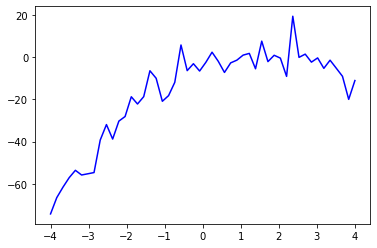

In [17]:
xdata = np.linspace(-4, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5, 1)
rng = np.random.default_rng()
y_noise = 5 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

In [18]:
# a > 0
popt, pcov = curve_fit(func, xdata, ydata,bounds=([0,-np.inf,-np.inf,-np.inf],np.inf))
popt

array([ 2.49299214,  1.81928561, -1.63869401,  5.37392782])

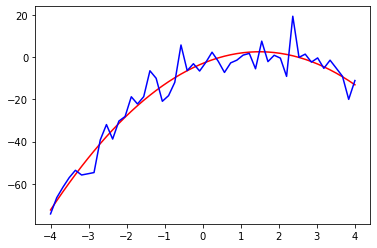

In [21]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'b-', label='data')